GMM

In [3]:
from algorithms.GMM import GMM
import datetime

start_time =  datetime.datetime(2018, 2, 7)
end_time =  datetime.datetime(2018, 2, 8)
gmm = GMM(start_time, end_time, 'cvw', n_clusters=30, useSavedResult=True, BoxCox=False)
#gmm.save_result()  # Save cluster labels so that GMM doesn't have to run again with these params
print(gmm.runtime)

416.61744451522827


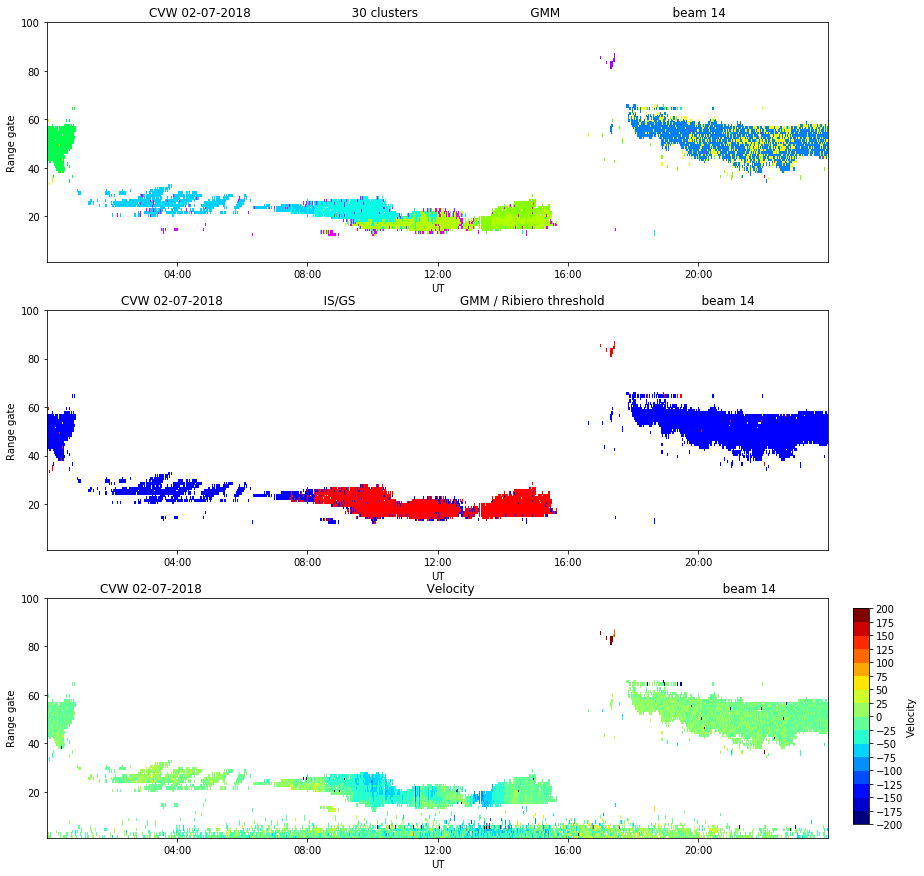

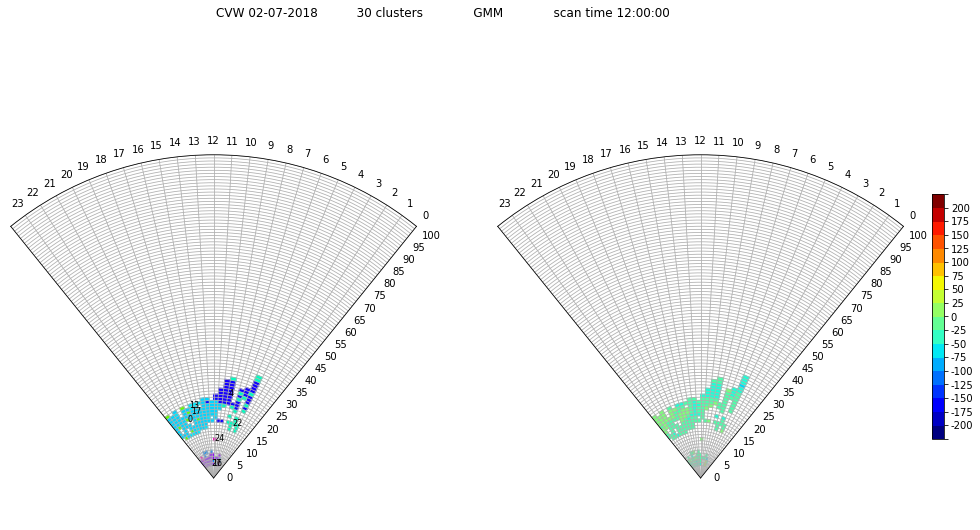

In [4]:
%matplotlib inline
# Make RTI plots to compare AJ's threshold with traditional threshold
gmm.plot_rti(14, 'Ribiero', save=True)           # Slooow
# Make fanplots of the individual clusters over some time period
fanplot_start =  datetime.datetime(2018, 2, 7, 12, 0, 0)
fanplot_end =  datetime.datetime(2018, 2, 7, 12, 0, 0)
gmm.plot_fanplots(fanplot_start, fanplot_end)

In [6]:
from algorithms.DBSCAN_GMM import DBSCAN_GMM
dbgmm = DBSCAN_GMM(start_time, end_time, 'cvw', useSavedResult=True, BoxCox=False)
#dbgmm.save_result()
print(dbgmm.runtime)

43.54023575782776


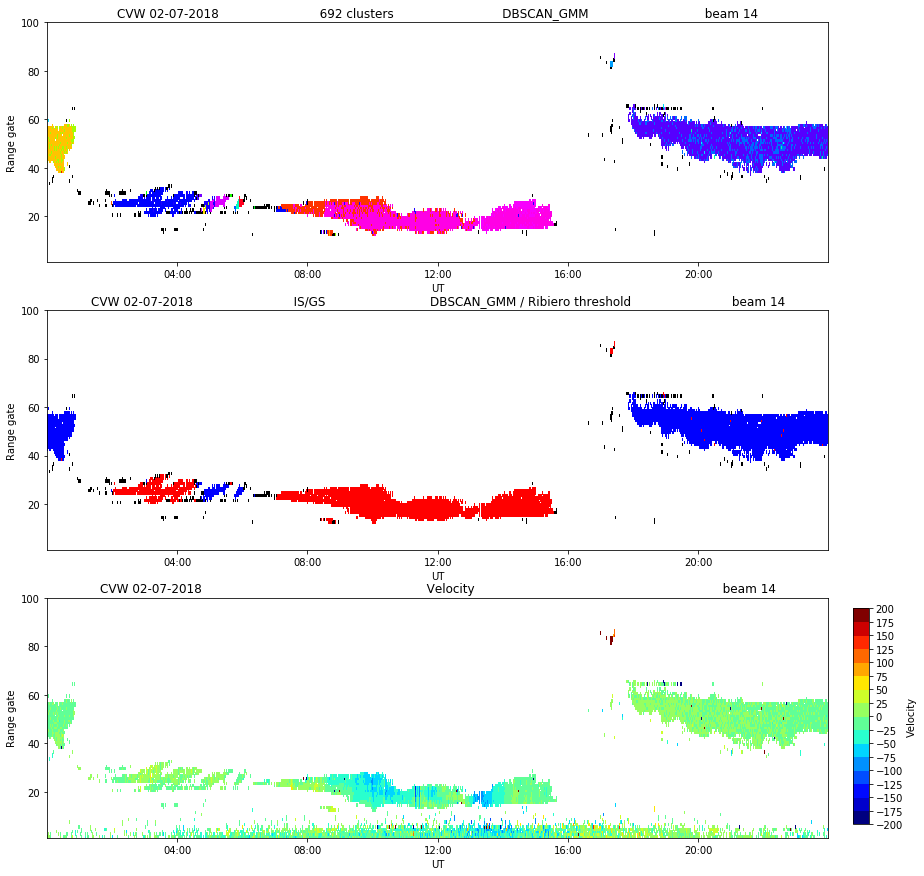

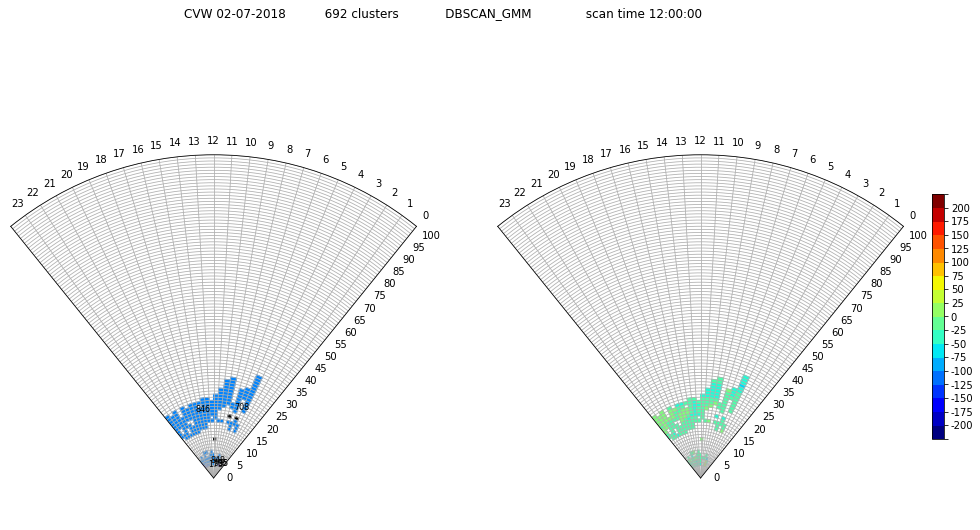

In [7]:
%matplotlib inline
# Make RTI plots to compare AJ's threshold with traditional threshold
dbgmm.plot_rti(14, 'Ribiero', save=True)           # Each of these take ~1 minute
# Make fanplots of the individual clusters over some time period
fanplot_start =  datetime.datetime(2018, 2, 7, 12, 0, 0)
fanplot_end =  datetime.datetime(2018, 2, 7, 12, 0, 0)
dbgmm.plot_fanplots(fanplot_start, fanplot_end, save=True)

In [8]:
from algorithms.GBDBSCAN import GBDBSCAN
gbdb = GBDBSCAN(start_time, end_time, 'cvw', useSavedResult=False)
gbdb.save_result()
print(gbdb.runtime)

486.4877882003784


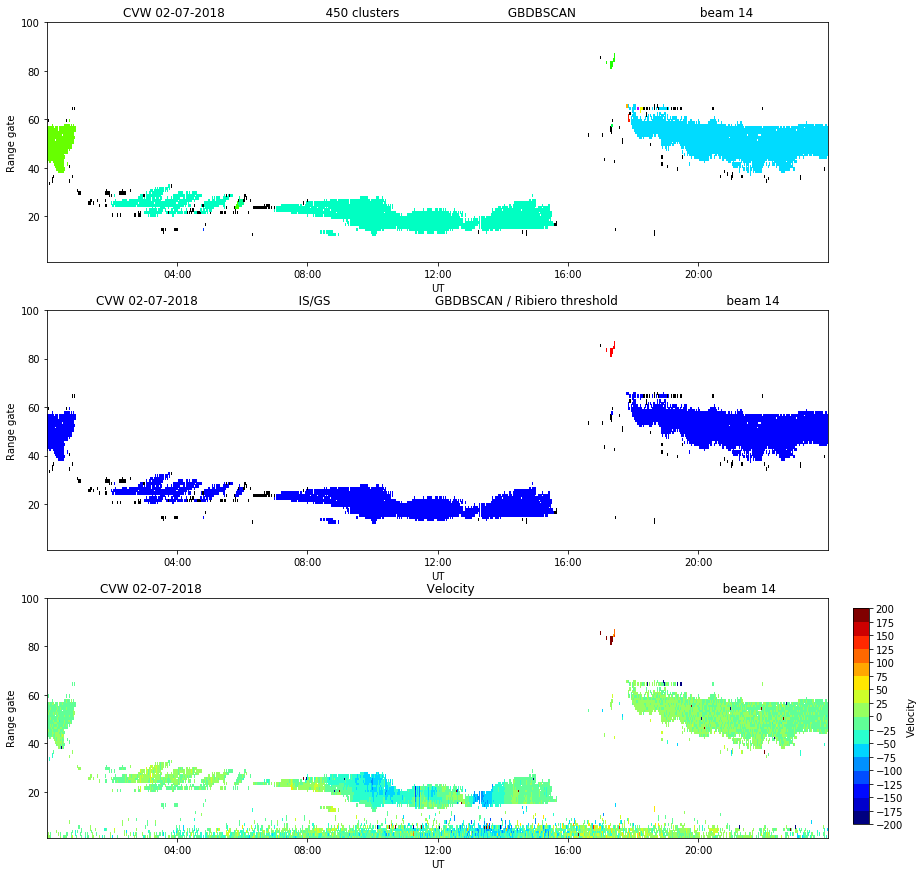

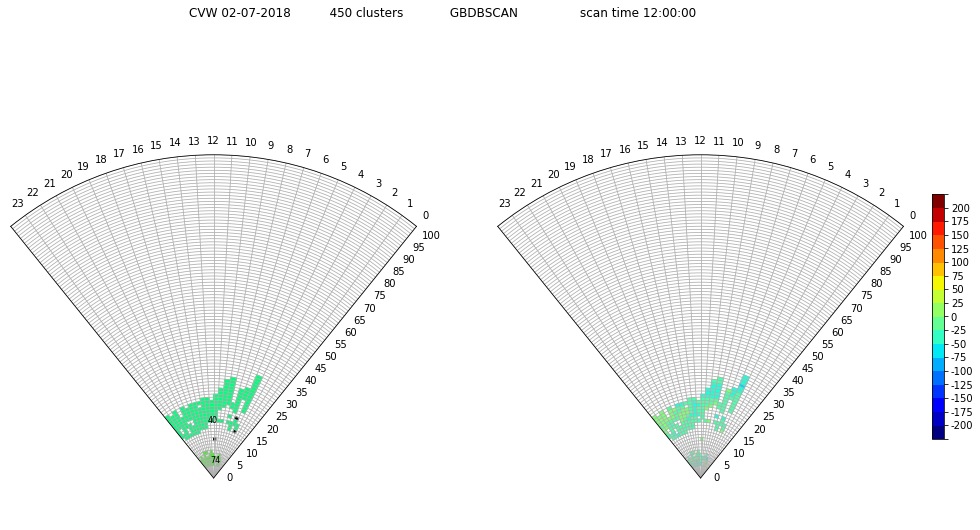

In [9]:
# Make RTI plots to compare AJ's threshold with traditional threshold
gbdb.plot_rti(14, 'Ribiero', save=True)
gbdb.plot_fanplots(fanplot_start, fanplot_end, save=True)

In [ ]:
from algorithms.GBDBSCAN_GMM import GBDBSCAN_GMM
gbdb_gmm = GBDBSCAN_GMM(start_time, end_time, 'cvw', useSavedResult=False)
gbdb_gmm.save_result()
print(gbdb_gmm.runtime)

In [ ]:
# Make RTI plots to compare AJ's threshold with traditional threshold
gbdb_gmm.plot_rti(14, 'Ribiero', save=True)
gbdb_gmm.plot_fanplots(fanplot_start, fanplot_end, save=True)